In [343]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
N = 10000

## Далее сгенерируем выборку с плотностью распределения 
## $\rho(x) = {5\over{x^{6}}}$      на луче $[1, +\infty)$

In [344]:
class some_distribution_gen(rv_continuous):
    def _pdf(self, x):
        return 5/x**6
some_distribution = some_distribution_gen(a = 1, name='some distribution')

selection = some_distribution.rvs(size = N)

## Построим график этой плотности, нанеся на ось x, точки нашей выборки.

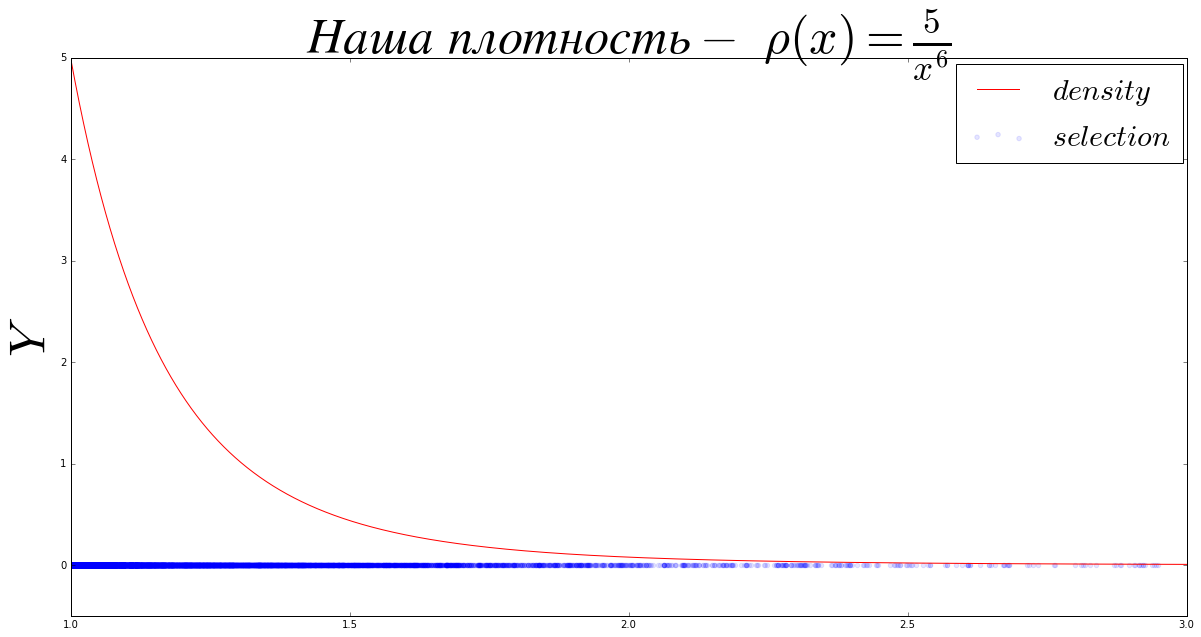

In [340]:
xvalues = []
x = 1;
for i in range(0, N) :
    xvalues.append(x);
    x+=3/N;
temp = np.array(xvalues);
density = (5 / (temp**6));
    
plt.figure(figsize=(20,10))
plt.title('$Наша\ плотность -$ $\\rho(x) = \\frac{5}{x^{6}}$', fontsize = 50);
plt.plot(xvalues, density, color = 'red', label = '$density$');
plt.scatter(selection, np.zeros(N), color = 'blue', alpha = 0.1, label = '$selection$');
plt.legend(loc='center left', bbox_to_anchor=(0.78, 0.9), fontsize = 30);
plt.ylabel('$Y$', fontsize = 50);
plt.xlim(1, 3);
plt.ylim(-0.5,5)
plt.show();

## Теперь для всех $n \leq N$ посчитаем отклонение от реальной дисперсии.
## Реальная дисперсия равна $\int_{1}^{\infty}x^2\rho(x)dx - (\int_{1}^{\infty}x\rho(x)dx)^2 = \int_{1}^{\infty}\frac{5}{x^4}dx - (\int_{1}^{\infty}\frac{5}{x^5}dx)^2 = \frac{5}{48}$

In [186]:
ourSum = 0;
ourSquaredSum = 0;
delta = []
for i in range(0, N) :
        ourSum += X[i];
        ourSquaredSum += X[i]**2;
        ourMean = ourSum / (i + 1);
        ourSquaredMean = ourSquaredSum / (i+1);
        ourVariance = ourSquaredMean - ourMean**2;
        delta.append(abs(ourVariance-(5/48)));


## Построим график

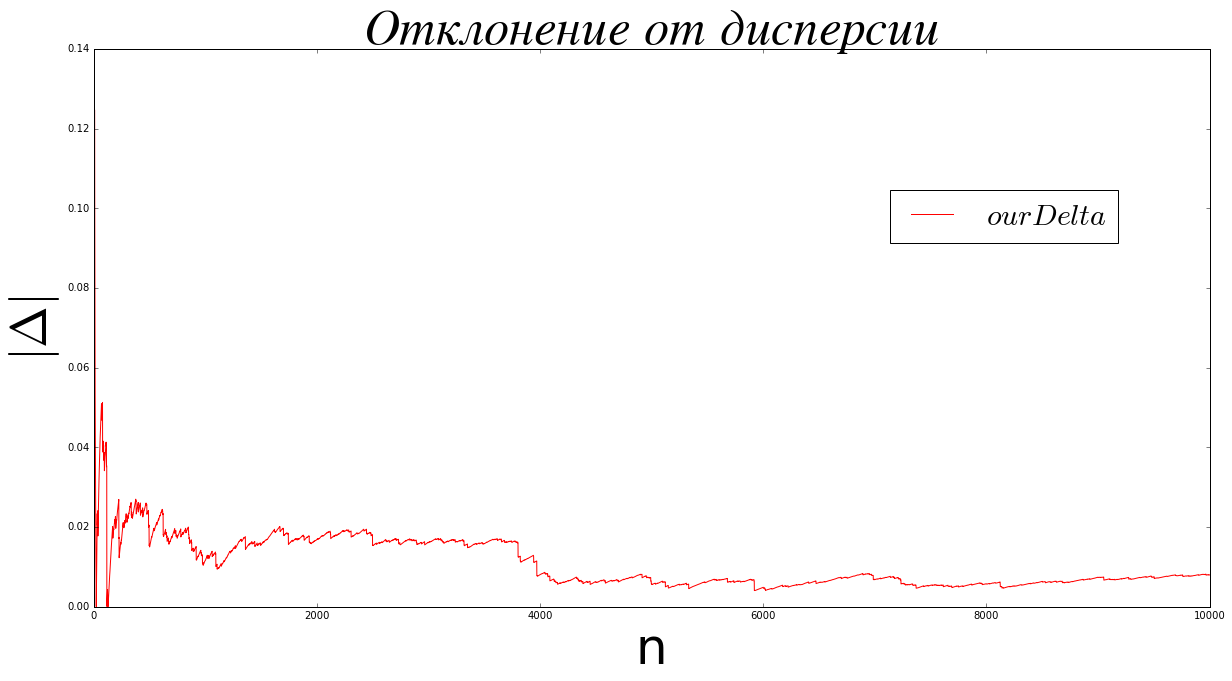

In [260]:
plt.figure(figsize=(20,10))
plt.title('$Отклонение\ от\ дисперсии$', fontsize = 50);
plt.plot(np.arange(1, N + 1), delta, color = 'red', label='$our Delta$');
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
plt.ylabel('$|\\Delta|$', fontsize = 50);
plt.xlabel('n', fontsize = 50)
plt.show()

## Теперь абсолютно то же самое для распределения КОШИ

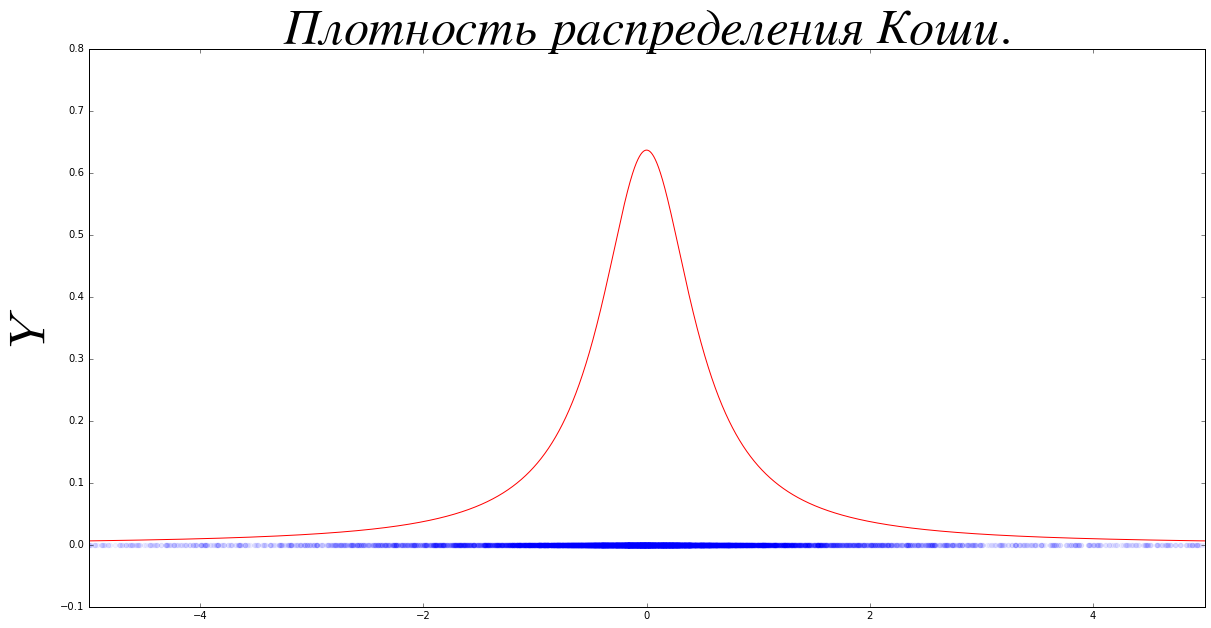

In [341]:
#Генерация выборки
x0 = 0;
gamma = 0.5
distribution = sps.cauchy(x0, gamma);
X = distribution.rvs(size = N);

# Построим график плотности.
xvalues = []
x = -5;
for i in range(0, 10000) :
    xvalues.append(x);
    x+=10/N;
temp = np.array(xvalues);
density = 1 / (np.pi * gamma *(1+ ((temp-x0)/gamma)**2 )); 

#Построение графика плотности
plt.figure(figsize=(20,10))
plt.title('$Плотность\ распределения\ Коши.$', fontsize = 50);
plt.plot(xvalues, density, color = 'red', label = '$Плотность$')
plt.scatter(X, np.zeros(N), color = 'blue', alpha = 0.05, label = '$selection$');
plt.ylabel('$Y$', fontsize = 50);
plt.xlim(-5, 5);
plt.ylim(-0.1, 0.8);
plt.show()

## Ну и график оценки дисперсии....

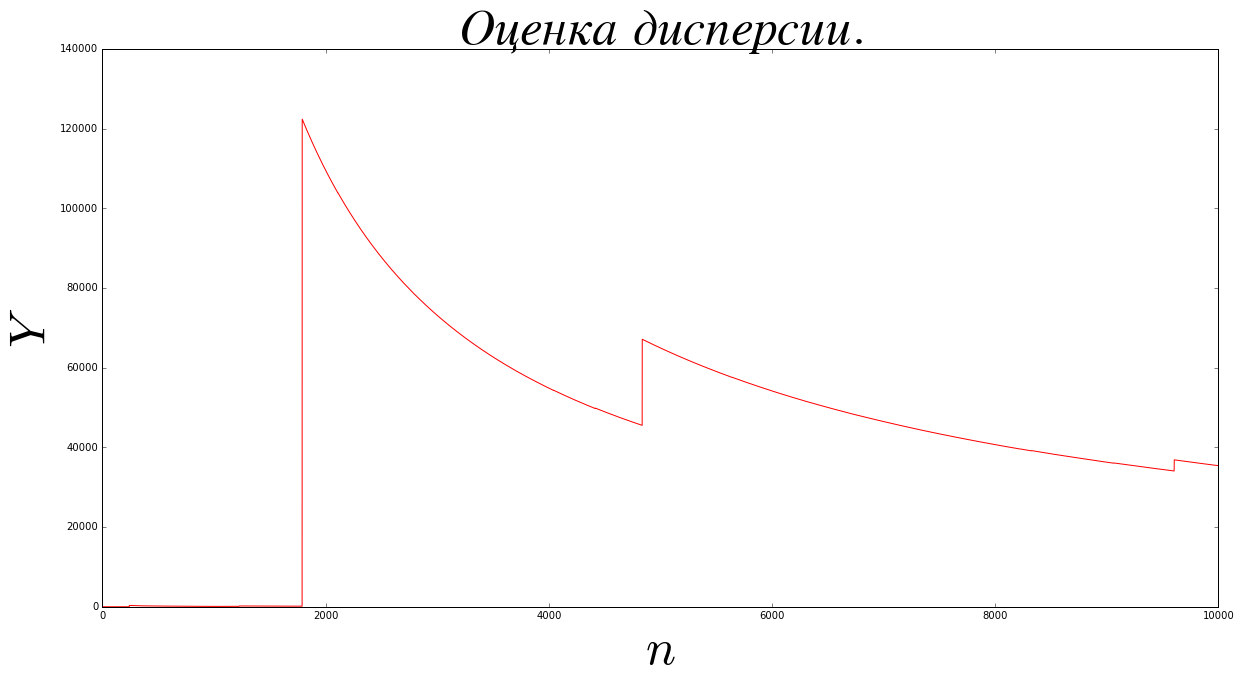

In [237]:
ourSum = 0;
ourSquaredSum = 0;
varianceEstimation = []
for i in range(0, N) :
    ourSum += X[i];
    ourSquaredSum += X[i]**2;
    ourMean = ourSum / (i + 1);
    ourSquaredMean = ourSquaredSum / (i+1);
    ourVariance = ourSquaredMean - ourMean**2;
    varianceEstimation.append(ourVariance);
    
plt.figure(figsize=(20,10))
plt.title('$Оценка\ дисперсии.$', fontsize = 50);
plt.plot(np.arange(1, N + 1), varianceEstimation, color = 'red', label = '$Она самая :)$');
plt.ylabel('$Y$', fontsize = 50);
plt.xlabel('$n$', fontsize = 50);
plt.show();